# GolemFlavor Tutorial

In this example, we will generate a fake measured flavour composition using a multivariate Gaussian distribution and sample from it using the [emcee](https://emcee.readthedocs.io/) MCMC algorithm.

In [1]:
from __future__ import absolute_import, division, print_function

from functools import partial

import numpy as np
import matplotlib.pyplot as plt

## Astrophysical Neutrino Flavor Mixing

### Source Flavor Composition

The origins and accelerations mechanisms of astrophysically produced neutrinos is still an active puzzle, and is part of a bigger question on the origins of ultra-high-energy cosmic rays. The new but very active field of neutrino flavor physics can be used as a powerful probe to help idenfify these sources. The most common hypothesis of the neutrino flavor composition at the source is one produced by the decay of a pion, which results in the following source composition:

$$\pi\:\text{decay}\rightarrow\left(f_e:f_\mu:f_\tau\right)_\text{S}=\left(1:2:0\right)_\text{S}$$

where $f_\alpha$ is the flavor composition of a neutrino with flavor $\alpha\in\{e,\mu,\tau\}$ and the subscript S represents that this is the flavour composition at the source. In the code below we normalize this to 1 for later calculations.

In [2]:
from golemflavor.fr import normalize_fr

source_composition = normalize_fr((1, 0, 0))
print('Source composition = ({:.2f} : {:.2f} : {:.2f})'.format(*source_composition))

Source composition = (1.00 : 0.00 : 0.00)


### Neutrino Mixing

For the three massive neutrinos, the flavour eigenstates of the neutrino $|\nu_\alpha>$, $\alpha\in\{e,\mu,\tau\}$, are related to the mass eigenstates $|\nu_i>$, $i\in\{1,2,3\}$ via a unitary mixing matrix $U_{\alpha i}$ known as the PMNS matrix:
    
$$ |\nu_\alpha>=\sum^3_{i=1}U^*_{\alpha i}|\nu_i> $$

The determination of the values of this mixing matrix is currently a world-wide effort. We can import values of this mixing from GolemFlavor which are taken from a [global fit to world neutrino data](<https://doi.org/10.1007/JHEP01(2017)087>):

In [3]:
from golemflavor.fr import NUFIT_U

print('Mixing Matrix =\n{}'.format(NUFIT_U))

Mixing Matrix =
[[ 0.82327921+0.j          0.54796108+0.j         -0.09913534+0.11010079j]
 [-0.30340559+0.06889398j  0.59033699+0.0458547j   0.74336952+0.j        ]
 [ 0.47090947+0.06045075j -0.58950774+0.04023502j  0.65226662+0.j        ]]


This mixing matrix says that neutrinos can oscillation from one flavor state $\alpha\in\{e,\mu,\tau\}$ to another $\beta\in\{e,\mu,\tau\}$ as a function of the propagation distance. The oscillation probability gives the probability that a neutrino produced in a flavour state $\alpha$ is then detected in a flavour state $\beta$ after a propagation distance $L$:

$$
\begin{align}
    P_{\nu_\alpha\rightarrow\nu_\beta}\left(L\right) &= \mid<\nu_\beta\left(L\right)|\nu_\alpha\left(0\right)>\mid^2\\
    &=\mid\sum_{i=1}^3U_{\beta i}U_{\alpha i}^*e^{-i\frac{m_i^2L}{2E}}\mid^2
\end{align}
$$

where $\Delta m_{ij}^2=m_i^2-m_j^2$ is the mass-squared differences and $E$ is the neutrino energy.

### Measured Flavor Composition

Once an astrophysical neutrino escapes the source it was produced from, they are free to propagate in the vacuum. Astrophysical neutrinos have $\mathcal{O}(\text{Mpc})$ or higher baselines, large enough that the mass eigenstates completely decouple ($L\rightarrow\infty$). This is useful for us, because the above oscillation probability simplifies so that:

$$
\begin{align}
    \phi_{i,\oplus}&=\sum_\alpha\phi_{\alpha,\text{S}}\mid{U_{\alpha i}}\mid^2\\
    \phi_{\alpha,\oplus}&=\sum_{i,\beta}
      \mid{U_{\alpha i}}\mid^2\mid{U_{\beta i}}\mid^2\phi_{\beta,\text{S}}
\end{align}
$$

This is nice because all the complicated interference terms drop out, and the oscillation depends only on the **square of the mixing matrix**. From this, the measured flavor composition on Earth is defined as $f_{\alpha,\oplus}=\phi_{\alpha,\oplus}/\sum_\alpha\phi_{\alpha,\oplus}$, where the $\oplus$ subscript denotes as measured on Earth. We can compute this using GolemFlavor:

In [4]:
from golemflavor.fr import u_to_fr

measured_composition = u_to_fr(source_composition, NUFIT_U)
print('Measured composition = ({:.2f} : {:.2f} : {:.2f})'.format(*measured_composition))

Measured composition = (0.55 : 0.18 : 0.27)


The effect of neutrino mixing has modified the flavor composition from $\left(1:0:0\right)_\text{S}\rightarrow\left(0.55:0.18:0.27\right)_\oplus$ at Earth!

Here is listed the expected measured compositions from some other source composition models:

$$
\begin{align}
    \left(0:1:0\right)_\text{S}&\rightarrow\left(0.18:0.44:0.38\right)_\oplus\\
    \left(1:2:0\right)_\text{S}&\rightarrow\left(0.31:0.35:0.34\right)_\oplus
\end{align}
$$

This can be more easily visualized using a [ternary plot](https://zenodo.org/badge/latestdoi/19505/marcharper/python-ternary), with axes being the fraction of each neutrino flavor:

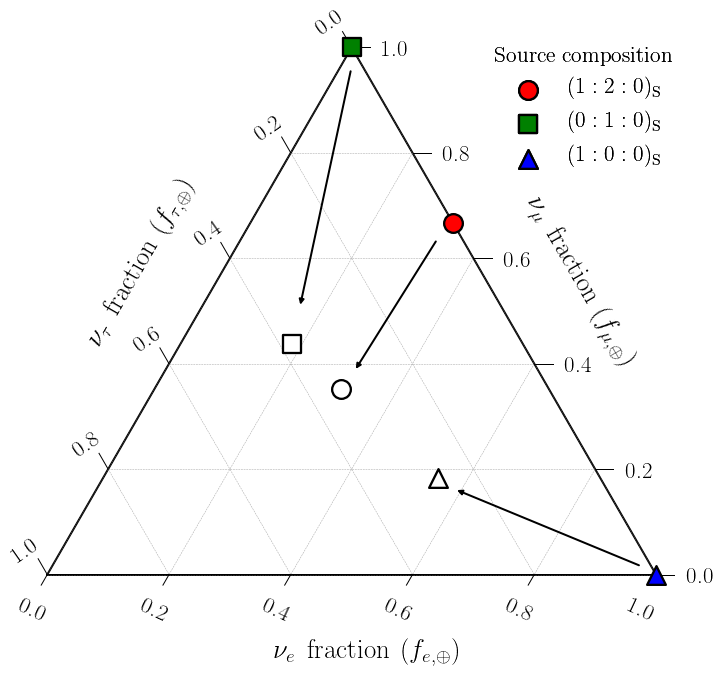

In [5]:
import golemflavor.plot as plot_utils
# getdist package requires `%matplotlib inline` to come after the import for inline notebook figures.
%matplotlib inline

nbins = 25
fontsize = 23

# Figure
fig = plt.figure(figsize=(12, 12))

# Axis
ax = fig.add_subplot(111)
tax = plot_utils.get_tax(ax, scale=nbins, rot_ax_labels=True)

# Plot source composition
tax.scatter([normalize_fr([1, 2, 0])*nbins], marker='o', s=350, facecolors='red',
            edgecolors='k', linewidth=2.3, label=r'$(1:2:0)_{\rm S}$', zorder=3)
tax.scatter([np.array([0, 1, 0])*nbins], marker='s', s=350, facecolors='green',
            edgecolors='k', linewidth=2.3, label=r'$(0:1:0)_{\rm S}$', zorder=3)
tax.scatter([np.array([1, 0, 0])*nbins], marker='^', s=350, facecolors='blue',
            edgecolors='k', linewidth=2.3, label=r'$(1:0:0)_{\rm S}$', zorder=3)

# Plot measured composition
tax.scatter([u_to_fr([1, 2, 0], NUFIT_U)*nbins], marker='o', s=350,
            edgecolors='k', facecolors='white', linewidth=2.3, zorder=3)
tax.scatter([u_to_fr([0, 1, 0], NUFIT_U)*nbins], marker='s', s=350,
            edgecolors='k', facecolors='white', linewidth=2.3, zorder=3)
tax.scatter([u_to_fr([1, 0, 0], NUFIT_U)*nbins], marker='^', s=350,
            edgecolors='k', facecolors='white', linewidth=2.3, zorder=3)

# Draw arrows
ax.annotate("", xy=np.array([0.415, 0.44])*nbins, xytext=np.array([0.499, 0.83])*nbins,
            arrowprops=dict(arrowstyle="-|>",facecolor='k',lw=2), zorder=3)
ax.annotate("", xy=np.array([0.505, 0.335])*nbins, xytext=np.array([0.64, 0.55])*nbins,
            arrowprops=dict(arrowstyle="-|>",facecolor='k',lw=2), zorder=3)
ax.annotate("", xy=np.array([0.67, 0.14])*nbins, xytext=np.array([0.975, 0.014])*nbins,
            arrowprops=dict(arrowstyle="-|>",facecolor='k',lw=2), zorder=3)

# Legend
l_size = fontsize
legend = plt.legend(loc=(0.7, 0.75), title=r'Source composition',
                    fontsize=l_size, prop={'size': fontsize})
plt.setp(legend.get_title(), fontsize=l_size)
ax.add_artist(legend)

plt.show()

The coloured circle, square and triangle show the source flavor compositions. The arrows show the effect of neutrino mixing on the flavor composition. The unfilled circle, square and triangle show the corresponding measured flavor composition. Neutrino mixing during propagation has the effect of averaging out the flavor contributions, which is why the arrows point towards the center of the triangle.

## Generate Fake Data

Using the things we have learned above, we can start to generate some data! Usually, this comes in the form of a likelihood fit comparing IceCube data to our models. GolemFlavor has built in hooks to the [`GolemFit` package](https://github.com/IceCubeOpenSource/GolemFit) for this, however `GolemFit` is only accessible to IceCube collaborators as it contains proprietary code/data. Instead, we can generate some fake data using a multivariate Gaussian likelihood. GolemFlavor has a convenient function to do such a task.

In [6]:
from golemflavor.llh import multi_gaussian
help(multi_gaussian)

Running without GolemFit
Help on function multi_gaussian in module golemflavor.llh:

multi_gaussian(fr, fr_bf, smearing, offset=-320)
    Multivariate Gaussian log likelihood.
    
    Parameters
    ----------
    fr : List[float], length 3
        The flavour composition to evaluate at.
    fr_bf : List[float], length 3
        The bestfit / injected flavour composition.
    smearing : float
        The amount of smearing.
    offset : float, optional
        An amount to offset the magnitude of the log likelihood.
    
    Returns
    ----------
    llh : float
        The log likelihood evaluated at `fr`.



### Smearing

In reality, a measurement does not have an arbitrary precision due to effects such as mis-reconstruction and model uncertainties. These effects are said to *smear* the data, and it can be described as in our Gaussian likelihood using the `smearing` keyword. Here we set the amount of smearing

In [7]:
smearing = 0.02

### Anarchic Sampling

Now we have everything we need to do scan over our likelihood, from which we will be able to visualize the effect of this smearing. However, scanning directly in the space of the flavour composition would not be the correct way to do the scan. This particular parameterization has degeneracies, since the total flavor composition must add up to 1, $\sum_{\alpha}f_\alpha=1$, which introduces an unwanted prior dependence.

The effective number of parameters of the flavor composition can be reduced from three to two due to the requirement $\sum_\alpha f_\alpha=1$. Therefore, in order to make sure we have an unbiased prior, the parameters in which to sample in must be determined by the [*Haar measure*](https://doi.org/10.1016/j.physletb.2003.08.045) of the flavor composition volume element, $\text{d}f_{e,\oplus}\wedge\text{d} f_{\mu,\oplus}\wedge\text{d}f_{\tau,\oplus}$. The following *flavor angles* parameterization was created for this reason:

$$
\begin{align}
    f_{\alpha,\oplus}=
    \begin{pmatrix}
      f_{e,\oplus} \\ f_{\mu,\oplus} \\ f_{\tau,\oplus}
    \end{pmatrix}=
    \begin{pmatrix}
      \sin^2\phi_\oplus\,\cos^2\psi_\oplus \\
      \sin^2\phi_\oplus\,\sin^2\psi_\oplus \\
      \cos^2\phi_\oplus
    \end{pmatrix}
\end{align}
$$

$$
\begin{align}
    \text{d} f_{e,\oplus}\wedge\text{d} f_{\mu,\oplus}\wedge\text{d} f_{\tau,\oplus}=
    \text{d}\left(\sin^4\phi_\oplus\right)\wedge
    \text{d}\left(\cos\left(2\psi_\oplus\right)\right)
\end{align}
$$

This basically tells us that we should scan in the parameter space defined by $\sin^4\phi_\oplus$ and $\cos\left(2\psi_\oplus\right)$. GolemFlavor contains a convenient function `fr_to_angles` to convert from flavor compositions to flavor angles.

In [8]:
from golemflavor.fr import fr_to_angles

measured_angles = fr_to_angles(measured_composition)
print('Measured composition = ({:.2f} : {:.2f} : {:.2f})'.format(*measured_composition))
print('Measured flavor angles = ({:.2f}, {:.2f})'.format(*measured_angles))

Measured composition = (0.55 : 0.18 : 0.27)
Measured flavor angles = (0.54, 0.50)


### Markov Chain Monte Carlo

Now we can define the wrappers to the [`emcee` package](https://emcee.readthedocs.io/en/stable/) which will sample over the flavor angles using an affine invariant MCMC algorithm. To do this, it is convenient to define our parameters using the GolemFlavor `ParamSet` class, as so:

In [9]:
from golemflavor.enums import ParamTag
from golemflavor.param import Param, ParamSet

# Convert from flavor composition to flavor angles
measured_flavor_angles = fr_to_angles(measured_composition)

# Params can be tagged for later convenience
tag = ParamTag.BESTFIT

# Define the asimov `ParamSet`, with `Param` objects containing information such as name, value and ranges.
# Note: std defines the Prior standard deviation, however default behaviour is to use a flat prior.
# The assignment of `std=smearing` is just a placeholder for later. See `measurement.ipynb` example for further details.
asimov_paramset = [
    Param(name='measured_angle1', value=measured_flavor_angles[0], ranges=[ 0., 1.], std=smearing, tag=tag, tex=r'\sin^4\phi_\oplus'),
    Param(name='measured_angle2', value=measured_flavor_angles[1], ranges=[-1., 1.], std=smearing, tag=tag, tex=r'\cos(2\psi_\oplus)')
]
asimov_paramset = ParamSet(asimov_paramset)

# Define the llh `ParamSet`, with `Param` objects containing information such as name, value and ranges.
tag = ParamTag.BESTFIT
src_compositions = [
    Param(name='measured_angle1', value=0, ranges=[ 0., 1.], tag=tag, tex=r'\sin^4\phi_\oplus'),
    Param(name='measured_angle2', value=0, ranges=[-1., 1.], tag=tag, tex=r'\cos(2\psi_\oplus)')
]
llh_paramset = ParamSet(src_compositions)

Here we have 2 `ParamSet` objects:
* `asimov_paramset` contains the measured parameters
* `llh_paramset` contains the model parameter values

In this example, they contain the same parameters since we are doing a simple scan over the measured flavor angles to generate some fake data.

Now, we wrap our `multi_gaussian` likelihood into a function that accepts input parameters `theta` from the MCMC:

In [10]:
from golemflavor.fr import angles_to_fr

def triangle_llh(theta, asimov_paramset, llh_paramset):
    """Log likelihood function for a given theta."""
    if len(theta) != len(llh_paramset):
        raise AssertionError(
            'Length of MCMC scan is not the same as the input '
            'params\ntheta={0}\nparamset]{1}'.format(theta, llh_paramset)
        )

    # Set llh_parameters values to the sampled parameters
    for idx, param in enumerate(llh_paramset):
        param.value = theta[idx]

    # Convert flavor angles to flavor compositions for the model parameters
    measured_angles = llh_paramset.from_tag(ParamTag.BESTFIT, values=True)
    measured_composition = angles_to_fr(measured_angles)

    # Convert flavor angles to flavor compositions for the injected parameters
    bestfit_measured_angles = asimov_paramset.from_tag(ParamTag.BESTFIT, values=True)
    bestfit_measured_comp = angles_to_fr(bestfit_measured_angles)

    # Get the value of `smearing`
    smearing = asimov_paramset['measured_angle1'].std

    # Calculate the log likelihood using `multi_gaussian`
    llh = multi_gaussian(measured_composition, bestfit_measured_comp, smearing)
    return llh

Last thing we need to setup is our prior distribution, which in this case is simply the bounds on the flavor angles. As we have defined this already in the `ParamSet` object using the `ranges` keyword, we can use the GolemFlavor function `lnprior` to do the work for us:

In [11]:
from golemflavor.llh import lnprior

def ln_prob(theta, asimov_paramset, llh_paramset):
    """Posterior function for a given theta."""
    # Get the value of the log prior (in this case it will be either 0 or -inf)
    lp = lnprior(theta, paramset=llh_paramset)
    if not np.isfinite(lp):
        return -np.inf
    
    # Return the log prior + log likelihood
    return lp + triangle_llh(theta, asimov_paramset, llh_paramset)

# Evalaute the posterior using the defined `asimov_paramset` and `llh_paramset`
ln_prob_eval = partial(
    ln_prob,
    asimov_paramset=asimov_paramset,
    llh_paramset=llh_paramset
)

Now we simply define the number of walkers, burnin period and number of steps to run the MCMC and GolemFlavor takes care of the rest!

In [12]:
import golemflavor.mcmc as mcmc_utils

# Reduce these values for a quicker runtime
nwalkers = 60
burnin = 1000
nsteps = 10000

# Generate initial seed using a flat distribution
p0 = mcmc_utils.flat_seed(
    llh_paramset, nwalkers=nwalkers
)

# Run the MCMC!
samples = mcmc_utils.mcmc(
    p0       = p0,
    ln_prob  = ln_prob_eval,
    ndim     = len(llh_paramset),
    nwalkers = nwalkers,
    burnin   = burnin,
    nsteps   = nsteps,
    threads  = 4
)

Running burn-in



Finished burn-in
Running



Finished
acceptance fraction [0.7219 0.7125 0.7154 0.7188 0.7112 0.7193 0.7156 0.7133 0.7199 0.7222
 0.7168 0.7169 0.7156 0.7231 0.7149 0.7072 0.7041 0.7273 0.7167 0.7129
 0.7157 0.7156 0.7218 0.7097 0.711  0.7197 0.7143 0.7153 0.7183 0.721
 0.7176 0.723  0.7143 0.7183 0.7157 0.7104 0.7171 0.7226 0.7225 0.7138
 0.7284 0.712  0.7108 0.7068 0.7148 0.7063 0.7089 0.7215 0.709  0.7121
 0.7092 0.713  0.7194 0.7231 0.7173 0.7133 0.7138 0.7193 0.7174 0.7107]
sum of acceptance fraction 42.950399999999995
np.unique(samples[:,0]).shape (429517,)
autocorrelation [32.93428515 33.45835797]


## Visualize Fake Data

Now that we have generated the fake data, let's see if we can visualize it in a ternary plot. First we convert the data from flavor angles into flavor compositions:

In [13]:
measured_angles = samples
measured_compositions = np.array(
    list(map(angles_to_fr, measured_angles))
)

Now we can display the 90%/99% credibility regions on the ternary plot to show how our fake data is distributed:

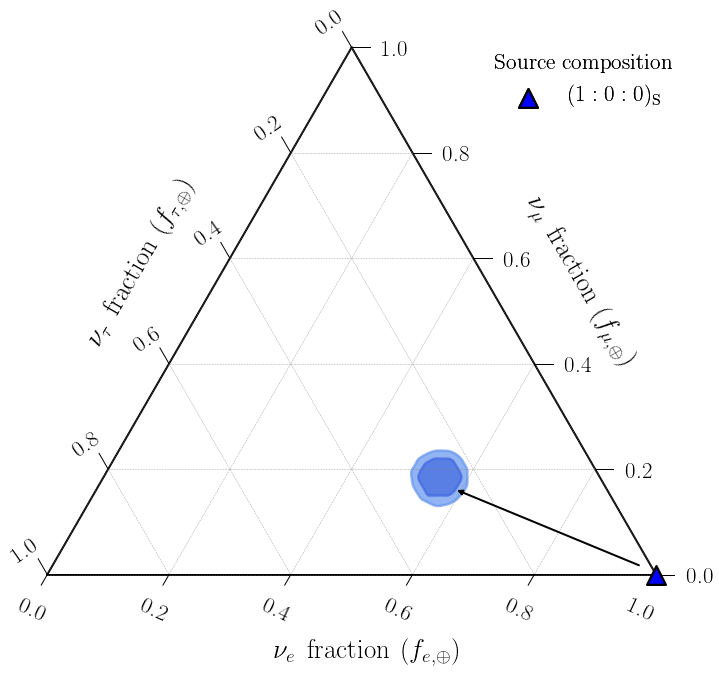

In [14]:
nbins = 25
fontsize = 23

# Figure
fig = plt.figure(figsize=(12, 12))

# Axis
ax = fig.add_subplot(111)
tax = plot_utils.get_tax(ax, scale=nbins, rot_ax_labels=True)

# Plot source composition
tax.scatter([np.array([1, 0, 0])*nbins], marker='^', s=350, facecolors='blue',
            edgecolors='k', linewidth=2.3, label=r'$(1:0:0)_{\rm S}$', zorder=3)

# Plot measured composition posteriors
coverages = [(99, 'cornflowerblue'), (90, 'royalblue')]
for cov, color in coverages:
    plot_utils.flavor_contour(
        frs=measured_compositions,
        fill=True,
        ax=ax,
        nbins=nbins,
        coverage=cov,
        linewidth=2.5,
        color=color,
        alpha=0.7,
        oversample=8
    )

# Draw arrow
ax.annotate("", xy=np.array([0.67, 0.14])*nbins, xytext=np.array([0.975, 0.014])*nbins,
            arrowprops=dict(arrowstyle="-|>",facecolor='k',lw=2), zorder=3)

# Legend
l_size = fontsize
handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(handles=[handles[-1]], labels=[labels[-1]], loc=(0.7, 0.85),
                    title=r'Source composition', fontsize=l_size, prop={'size': fontsize})
plt.setp(legend.get_title(), fontsize=l_size)
ax.add_artist(legend)

plt.show()

What a measurement! In truth, the accuracy shown here has not been reached thus far, however the field of neutrino flavor physics is developing quickly. If you are interested in comparing this to a real flavor contour then you can checkout [this paper](https://doi.org/10.1088/0004-637X/809/1/98) by the IceCube collaboration.

Thanks for reading! In the next example, `inference.ipynb`, we will see if we can make an inference of the source flavor composition using this fake data.